In [341]:
import numpy as np
import random
import math

In [2]:
import matplotlib.pyplot as plt

## Question 1

In [4]:
horizon = 1000

In [5]:
means = [-0.3, 0.0, 0.2, 0.3, 0.6]

Epsilon Greedy Method

In [253]:
def rewardepsilon(epsilon,arr1,arr2): #arr1 = sum of rewards till that time point for every arm that is pulled. arr2 = number of times pulled
    k = random.uniform(0, 1)
    maxarm = -1
    maxrew = -1000
    for i in range(len(arr1)):
        if(arr2[i]>0):
            if((arr1[i]/arr2[i])>maxrew): maxarm = i
    if(k > epsilon): 
        reward = np.random.normal(means[maxarm],1)
        arr1[maxarm] += reward
        arr2[maxarm] += 1
        return reward,maxarm
    else:
        arm = random.randint(0,4)
        reward = np.random.normal(means[arm],1)
        arr1[arm] += reward
        arr2[arm] += 1
        return reward,arm

In [8]:
agentepsilon = [0, 0.1, 0.15, 0.2, 0.5]

In [153]:
def epsilongreedy(j):
    rew1 = np.zeros(1000)
    arm1 = np.zeros(1000)
    arm2 = np.zeros(1000)
    arm3 = np.zeros(1000)
    arm4 = np.zeros(1000)
    arm5 = np.zeros(1000)
    for k in range(1000):
        arr1 = np.zeros(5)
        arr2 = np.zeros(5)
        rew = np.empty(0)
        arm = random.randint(0,4)
        reward = np.random.normal(means[arm],1)
        arr1[arm] += reward
        arr2[arm] += 1
        if(arm == 0): arm1[0] += 1
        elif(arm == 1):arm2[0] += 1
        elif(arm == 2):arm3[0] += 1
        elif(arm == 3):arm4[0] += 1
        else:arm5[0] += 1
        rew = np.append(rew,reward)
        for i in range(1,horizon):
            reward,arm = rewardepsilon(j,arr1,arr2)
            rew = np.append(rew,reward)
            if(arm == 0): arm1[i] += 1
            elif(arm == 1):arm2[i] += 1
            elif(arm == 2):arm3[i] += 1
            elif(arm == 3):arm4[i] += 1
            else:arm5[i] += 1
        for i in range(1000):
            if(k==0): 
                rew1[i] = rew[i]
                break
            n = (k*rew1[i] + rew[i])/(k+1) 
            rew1[i] = n
    for i in range(1,1000):
        arm1[i] = arm1[i] + arm1[i-1]
        arm2[i] = arm2[i] + arm2[i-1]
        arm3[i] = arm3[i] + arm3[i-1]
        arm4[i] = arm4[i] + arm4[i-1]
        arm5[i] = arm5[i] + arm5[i-1]
    return rew1,arm1/1000,arm2/1000,arm3/1000,arm4/1000,arm5/1000

Explore and Exploit

In [160]:
def exploreandexploit():
    rew = np.zeros(1000)
    arm1 = np.zeros(1000)
    arm2 = np.zeros(1000)
    arm3 = np.zeros(1000)
    arm4 = np.zeros(1000)
    arm5 = np.zeros(1000)
    for j in range(1000):
        arr1 = np.zeros(5)
        arr2 = np.array([10,10,10,10,10])
        rewards = np.empty(0)
        for k in range(50):
            if(k<10): 
                r = np.random.normal(means[0],1)
                arr1[0] += r
                rewards = np.append(rewards,r)
                arm1[k] += 1
            elif(k<20):
                r = np.random.normal(means[1],1)
                arr1[1] += r
                rewards = np.append(rewards,r)
                arm2[k] += 1
            elif(k<30):
                r = np.random.normal(means[2],1)
                arr1[2] += r
                rewards = np.append(rewards,r)
                arm3[k] += 1
            elif(k<40):
                r = np.random.normal(means[3],1)
                arr1[3] += r
                rewards = np.append(rewards,r)
                arm4[k] += 1
            elif(k<50):
                r = np.random.normal(means[4],1)
                arr1[4] += r
                rewards = np.append(rewards,r)
                arm5[k] += 1
        maxrewarm = np.where(arr1 == np.max(arr1))[0][0]
        for i in range(50,1000):
            r = np.random.normal(means[maxrewarm],1)
            rewards = np.append(rewards,r)
            if(maxrewarm == 0): arm1[i] += 1
            elif(maxrewarm == 1):arm2[i] += 1
            elif(maxrewarm == 2):arm3[i] += 1
            elif(maxrewarm == 3):arm4[i] += 1
            else:arm5[i] += 1
        for i in range(1000):
            if(j==0): 
                rew[i] = rewards[i]
                break
            n = ((j)*rew[i] + rewards[i])/(j+1) 
            rew[i] = n
    for i in range(1,1000):
        arm1[i] = arm1[i] + arm1[i-1]
        arm2[i] = arm2[i] + arm2[i-1]
        arm3[i] = arm3[i] + arm3[i-1]
        arm4[i] = arm4[i] + arm4[i-1]
        arm5[i] = arm5[i] + arm5[i-1]
    return rew,arm1/1000,arm2/1000,arm3/1000,arm4/1000,arm5/1000

UCB Algorithm

In [165]:
def getreward3(arr1,arr2,j,c):
    upperbound = [arr1[i]/arr2[i] + c*math.sqrt(np.log(j)/arr2[i]) for i in range(5)]
    max_index = upperbound.index(max(upperbound)) 
    reward = np.random.normal(means[max_index],1)
    arr1[max_index] += reward
    arr2[max_index] += 1
    return reward,max_index

In [168]:
def UCB(c):
    rew1 = np.zeros(1000)
    arm1 = np.zeros(1000)
    arm2 = np.zeros(1000)
    arm3 = np.zeros(1000)
    arm4 = np.zeros(1000)
    arm5 = np.zeros(1000)
    for i in range(1000):
        rew = np.empty(0)
        arr1 = np.zeros(5)
        arr2 = np.array([10,10,10,10,10])
        for k in range(50):
            if(k<10): 
                r = np.random.normal(means[0],1)
                arr1[0] += r
                rew = np.append(rew,r)
                arm1[k] += 1
            elif(k<20):
                r = np.random.normal(means[1],1)
                arr1[1] += r
                rew = np.append(rew,r)
                arm2[k] += 1
            elif(k<30):
                r = np.random.normal(means[2],1)
                arr1[2] += r
                rew = np.append(rew,r)
                arm3[k] +=1
            elif(k<40):
                r = np.random.normal(means[3],1)
                arr1[3] += r
                rew = np.append(rew,r)
                arm4[k] += 1
            elif(k<50):
                r = np.random.normal(means[4],1)
                arr1[4] += r
                rew = np.append(rew,r)
                arm5[k] += 1
        for j in range(51,1001):
            reward,arm = getreward3(arr1,arr2,j,c)
            rew = np.append(rew,reward)
            if(arm == 0): arm1[j-1] += 1
            elif(arm == 1):arm2[j-1] += 1
            elif(arm == 2):arm3[j-1] += 1
            elif(arm == 3):arm4[j-1] += 1
            else:arm5[j-1] += 1
        for l in range(1000):
            if(i==0): 
                rew1[l] = rew[l]
                break
            n = (i*rew1[l] + rew[l])/(i+1) 
            rew1[l] = n
    for i in range(1,1000):
        arm1[i] = arm1[i] + arm1[i-1]
        arm2[i] = arm2[i] + arm2[i-1]
        arm3[i] = arm3[i] + arm3[i-1]
        arm4[i] = arm4[i] + arm4[i-1]
        arm5[i] = arm5[i] + arm5[i-1]

    return rew1,arm1/1000,arm2/1000,arm3/1000,arm4/1000,arm5/1000

### 1(a)

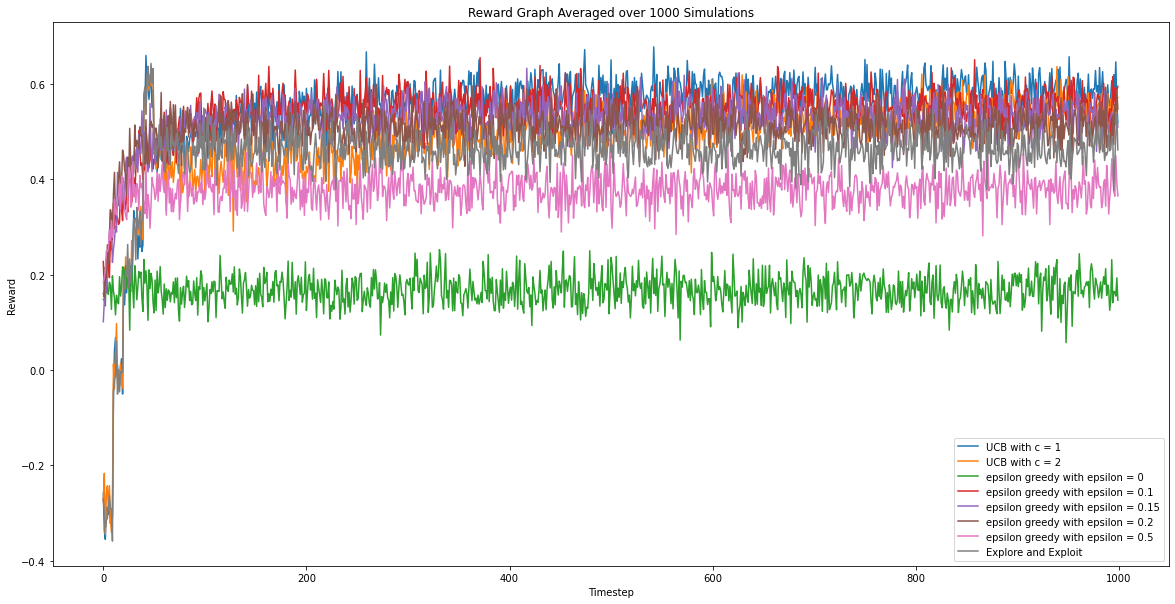

In [329]:
plt.figure(figsize=(20,10))
rewardUCB1,arm1ucb1,arm2ucb1,arm3ucb1,arm4ucb1,arm5ucb1 = UCB(1)
plt.plot(rewardUCB1, label = "UCB with c = 1")
rewardUCB2,arm1ucb2,arm2ucb2,arm3ucb2,arm4ucb2,arm5ucb2 = UCB(2)
plt.plot(rewardUCB2, label = "UCB with c = 2")
rewep0,arm1ep0,arm2ep0,arm3ep0,arm4ep0,arm5ep0 = epsilongreedy(0)
plt.plot(rewep0,label = 'epsilon greedy with epsilon = 0' )
rewep1,arm1ep1,arm2ep1,arm3ep1,arm4ep1,arm5ep1 = epsilongreedy(0.1)
plt.plot(rewep1,label = 'epsilon greedy with epsilon = 0.1' )
rewep2,arm1ep2,arm2ep2,arm3ep2,arm4ep2,arm5ep2 = epsilongreedy(0.15)
plt.plot(rewep2,label = 'epsilon greedy with epsilon = 0.15' )
rewep3,arm1ep3,arm2ep3,arm3ep3,arm4ep3,arm5ep3 = epsilongreedy(0.2)
plt.plot(rewep3,label = 'epsilon greedy with epsilon = 0.2' )
rewep4,arm1ep4,arm2ep4,arm3ep4,arm4ep4,arm5ep4 = epsilongreedy(0.5)
plt.plot(rewep4,label = 'epsilon greedy with epsilon = 0.5' )
reward,armeae1,armeae2,armeae3,armeae4,armeae5 = exploreandexploit()
plt.plot(reward,label = 'Explore and Exploit')
plt.xlabel('Timestep')  
plt.ylabel('Reward')
plt.title('Reward Graph Averaged over 1000 Simulations')
plt.legend()

Calculating Pseudo Regret

In [335]:
for i in range(1,1000):
    rewardUCB1[i] = rewardUCB1[i] + rewardUCB1[i-1]
    rewardUCB2[i] = rewardUCB2[i] + rewardUCB2[i-1]
    rewep0[i] = rewep0[i] + rewep0[i-1]
    rewep1[i] = rewep1[i] + rewep1[i-1]
    rewep2[i] = rewep2[i] + rewep2[i-1]
    rewep3[i] = rewep3[i] + rewep3[i-1]
    rewep4[i] = rewep4[i] + rewep4[i-1]
    reward[i] = reward[i] + reward[i-1]

In [319]:
for i in range(1,1001):
    rewardUCB1[i-1] = (0.6*i - rewardUCB1[i-1])/i
    rewardUCB2[i-1] = (0.6*i - rewardUCB2[i-1])/i
    rewep0[i-1] = (0.6*i - rewep0[i-1])/i
    rewep1[i-1] = (0.6*i - rewep1[i-1])/i
    rewep2[i-1] = (0.6*i - rewep2[i-1])/i
    rewep3[i-1] = (0.6*i - rewep3[i-1])/i
    rewep4[i-1] = (0.6*i - rewep4[i-1])/i
    reward[i-1] = (0.6*i - reward[i-1])/i

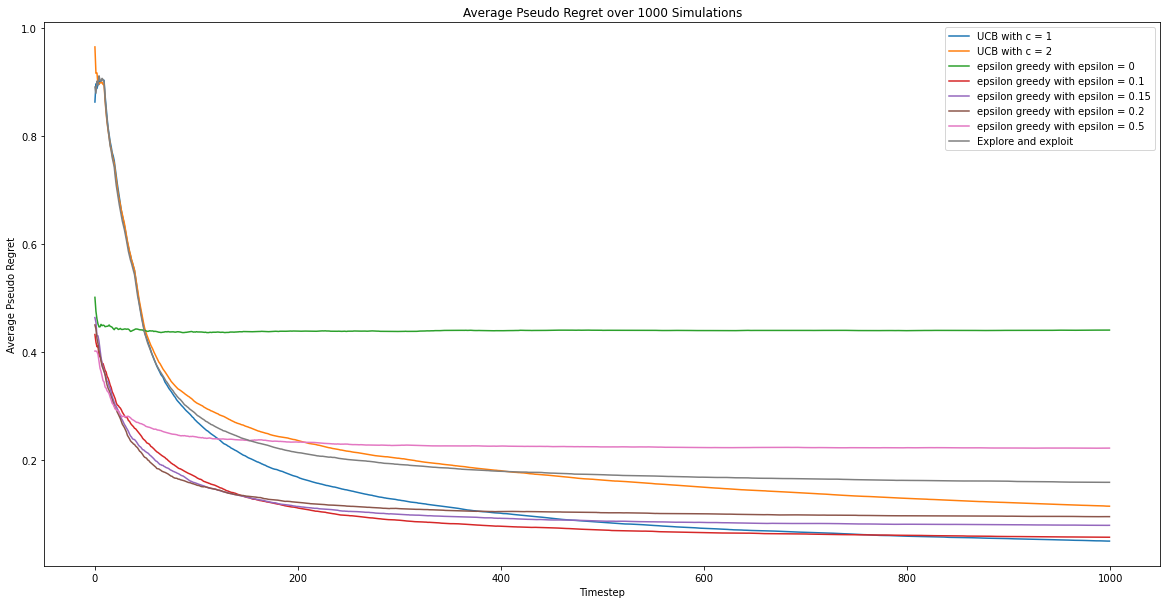

In [279]:
plt.figure(figsize = (20,10))
plt.plot(rewardUCB1,label = 'UCB with c = 1')
plt.plot(rewardUCB2,label = 'UCB with c = 2')
plt.plot(rewep0,label = 'epsilon greedy with epsilon = 0')
plt.plot(rewep1,label = 'epsilon greedy with epsilon = 0.1')
plt.plot(rewep2,label = 'epsilon greedy with epsilon = 0.15')
plt.plot(rewep3,label = 'epsilon greedy with epsilon = 0.2')
plt.plot(rewep4,label = 'epsilon greedy with epsilon = 0.5')
plt.plot(reward,label = 'Explore and exploit')
plt.xlabel('Timestep')  
plt.ylabel('Average Pseudo Regret')
plt.title('Average Pseudo Regret over 1000 Simulations')
plt.legend()

### 1(b)

Epsilon Greedy with epsilon = 0

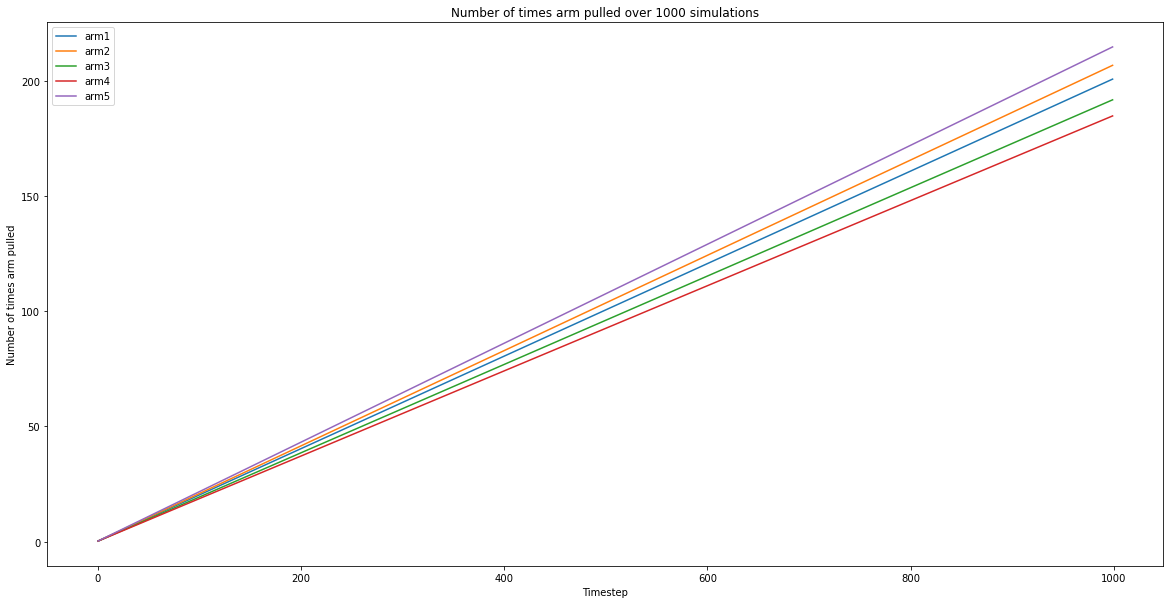

In [287]:
plt.figure(figsize=(20,10))
plt.plot(arm1ep0,label = 'arm1')
plt.plot(arm2ep0,label = 'arm2')
plt.plot(arm3ep0,label = 'arm3')
plt.plot(arm4ep0,label = 'arm4')
plt.plot(arm5ep0,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations')
plt.legend()

Epsilon Greedy with epsilon = 0.1

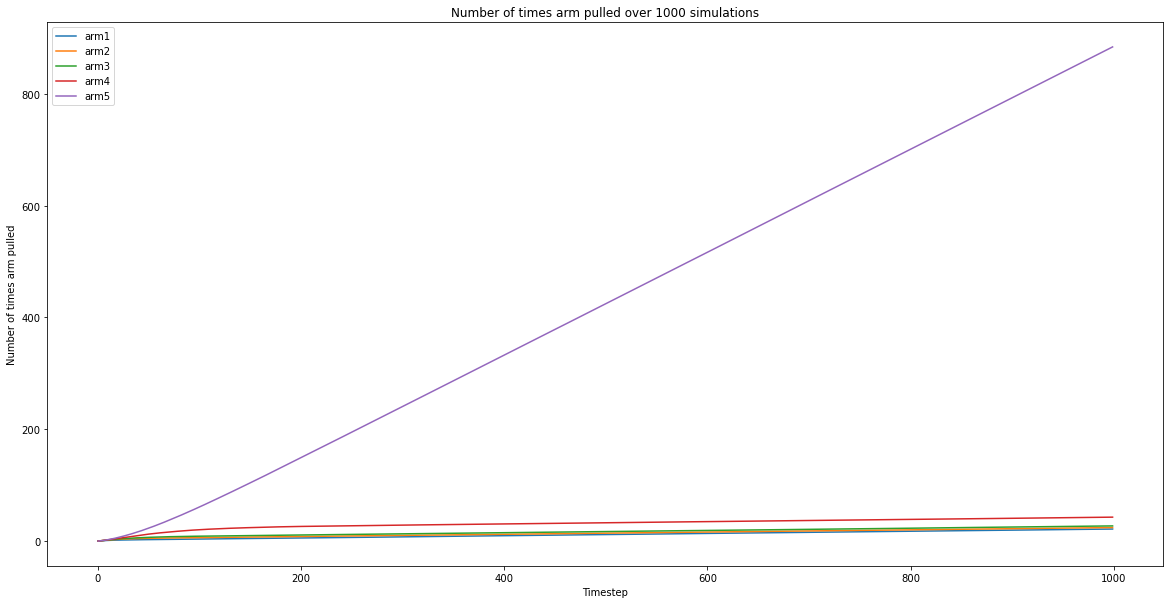

In [286]:
plt.figure(figsize=(20,10))
plt.plot(arm1ep1,label = 'arm1')
plt.plot(arm2ep1,label = 'arm2')
plt.plot(arm3ep1,label = 'arm3')
plt.plot(arm4ep1,label = 'arm4')
plt.plot(arm5ep1,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations')
plt.legend()

Epsilon Greedy with epsilon = 0.15

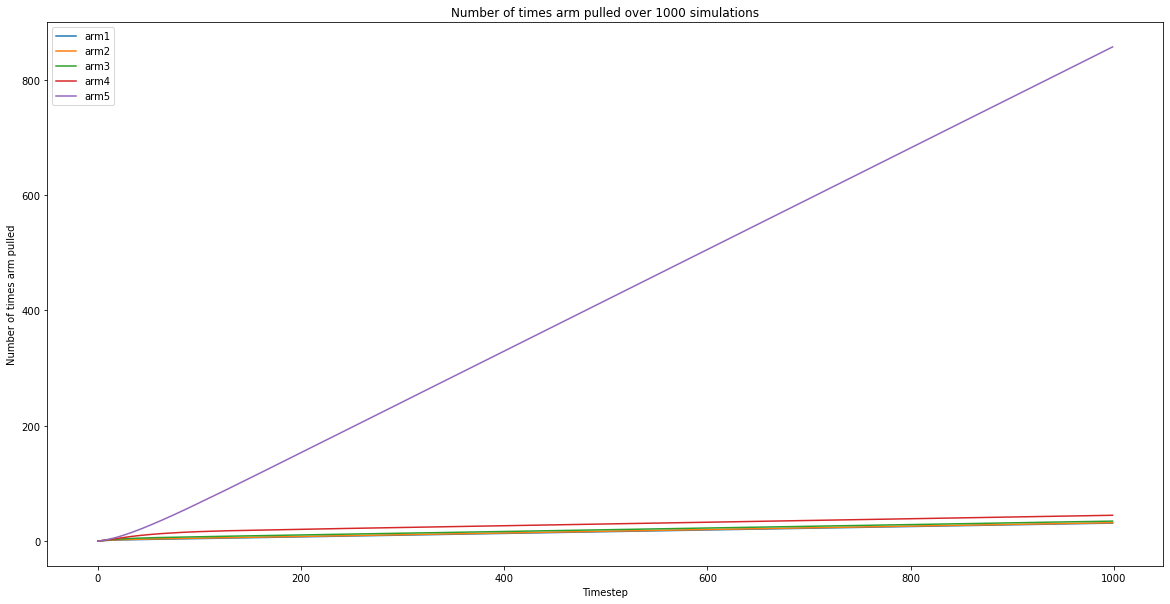

In [285]:
plt.figure(figsize=(20,10))
plt.plot(arm1ep2,label = 'arm1')
plt.plot(arm2ep2,label = 'arm2')
plt.plot(arm3ep2,label = 'arm3')
plt.plot(arm4ep2,label = 'arm4')
plt.plot(arm5ep2,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations')
plt.legend()

Epsilon Greedy with epsilon = 0.2

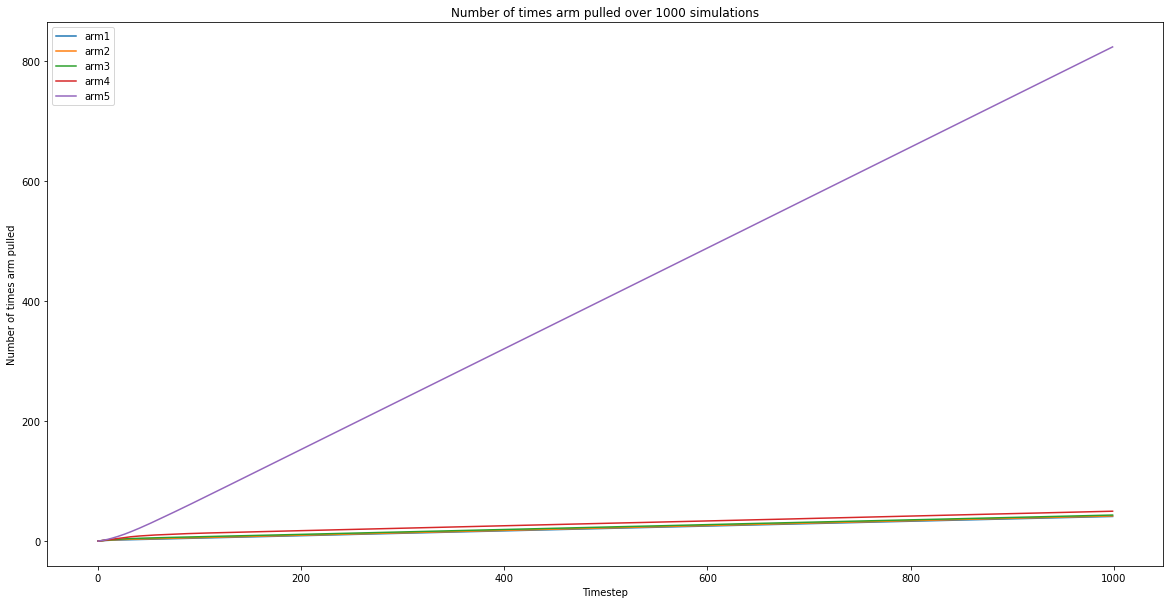

In [284]:
plt.figure(figsize=(20,10))
plt.plot(arm1ep3,label = 'arm1')
plt.plot(arm2ep3,label = 'arm2')
plt.plot(arm3ep3,label = 'arm3')
plt.plot(arm4ep3,label = 'arm4')
plt.plot(arm5ep3,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations')
plt.legend()

Epsilon Greedy with epsilon = 0.5

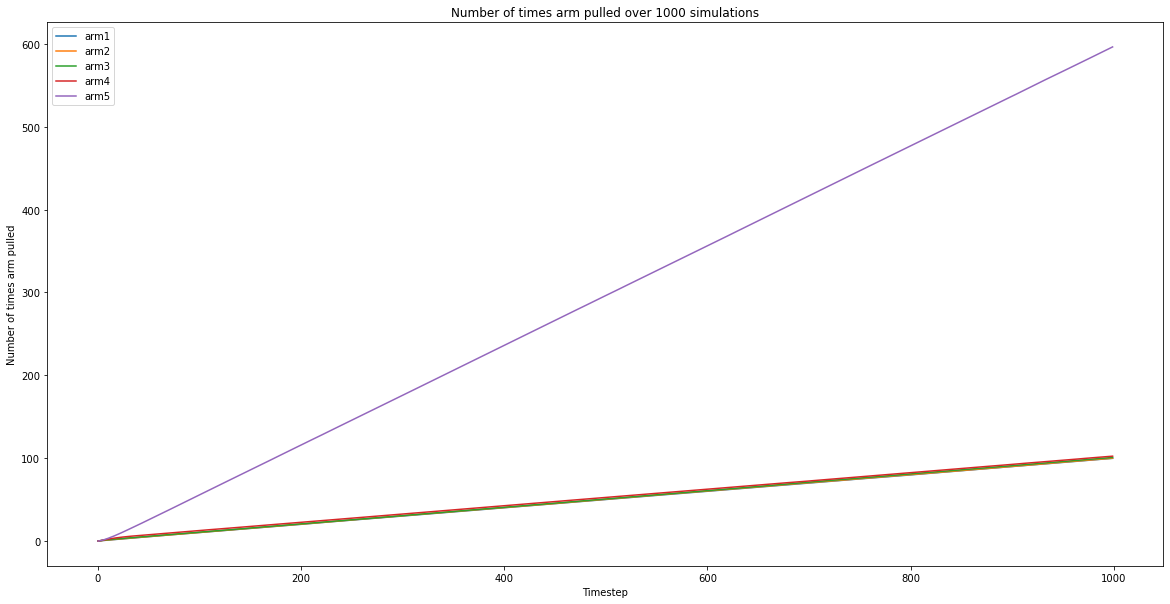

In [283]:
plt.figure(figsize=(20,10))
plt.plot(arm1ep4,label = 'arm1')
plt.plot(arm2ep4,label = 'arm2')
plt.plot(arm3ep4,label = 'arm3')
plt.plot(arm4ep4,label = 'arm4')
plt.plot(arm5ep4,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations')
plt.legend()

UCB with c = 1

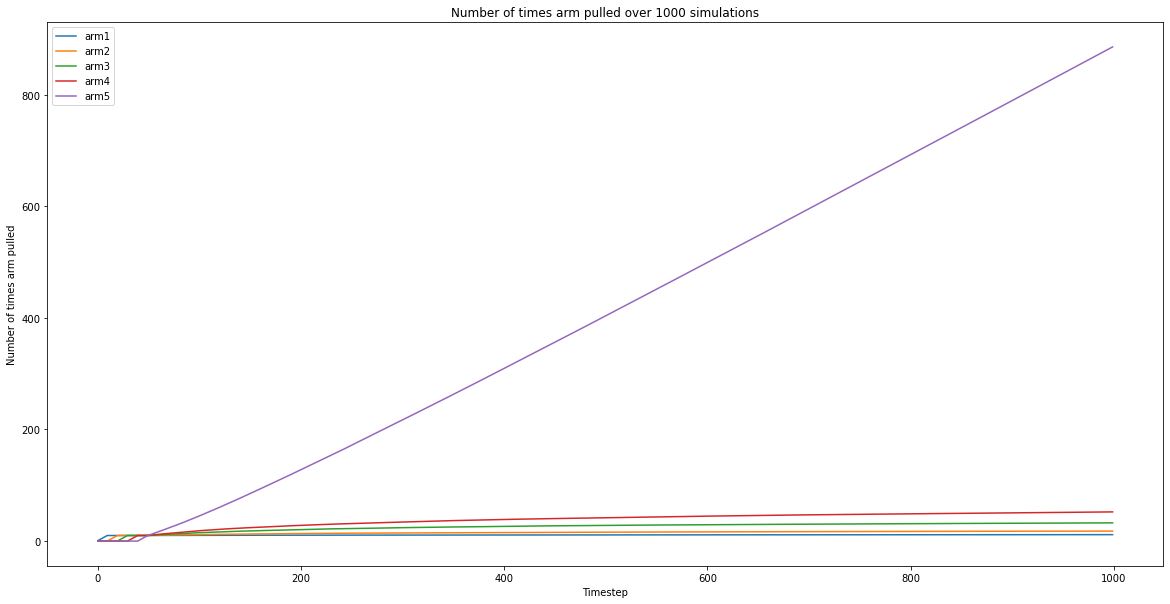

In [232]:
plt.figure(figsize=(20,10))
plt.plot(arm1ucb1,label = 'arm1')
plt.plot(arm2ucb1,label = 'arm2')
plt.plot(arm3ucb1,label = 'arm3')
plt.plot(arm4ucb1,label = 'arm4')
plt.plot(arm5ucb1,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations')
plt.legend()

UCB with c = 2

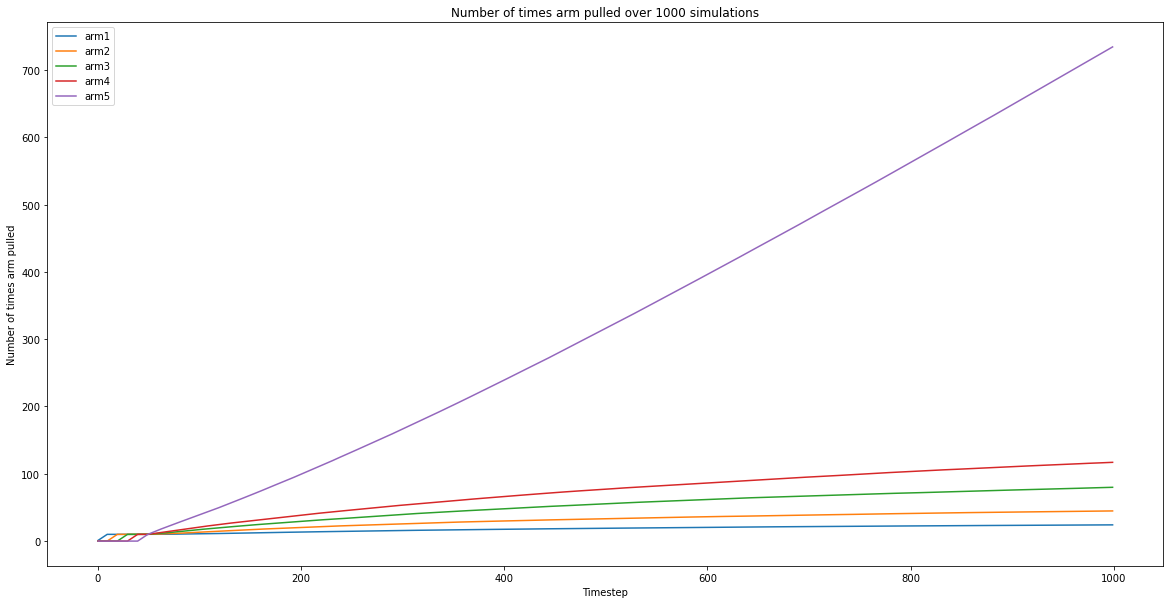

In [288]:
plt.figure(figsize=(20,10))
plt.plot(arm1ucb2,label = 'arm1')
plt.plot(arm2ucb2,label = 'arm2')
plt.plot(arm3ucb2,label = 'arm3')
plt.plot(arm4ucb2,label = 'arm4')
plt.plot(arm5ucb2,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations')
plt.legend()

Explore and exploit

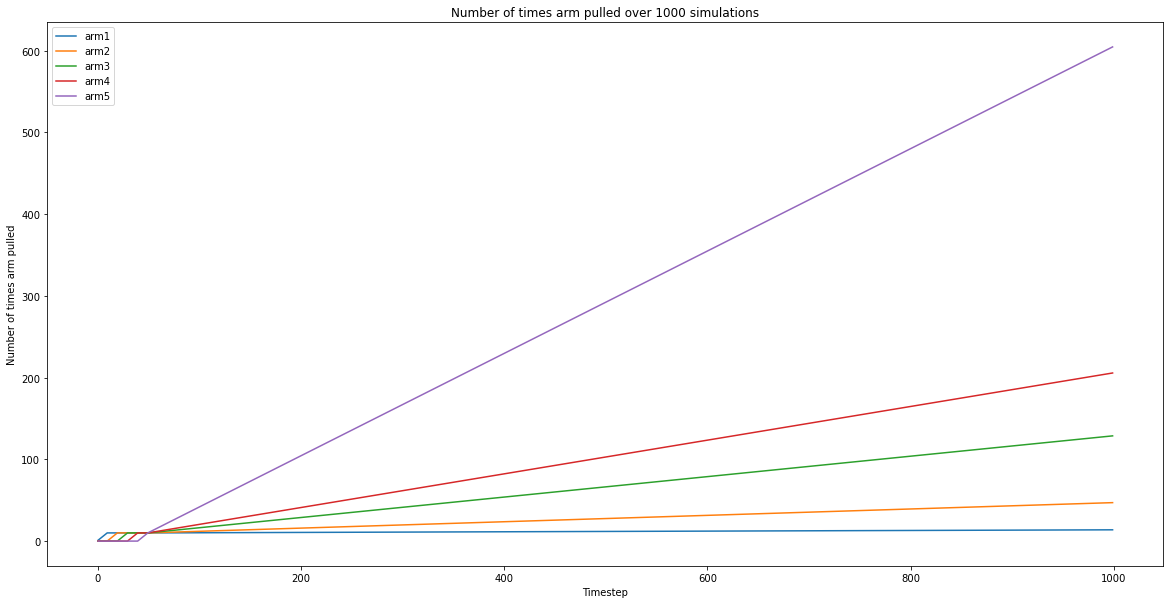

In [234]:
plt.figure(figsize=(20,10))
plt.plot(armeae1,label = 'arm1')
plt.plot(armeae2,label = 'arm2')
plt.plot(armeae3,label = 'arm3')
plt.plot(armeae4,label = 'arm4')
plt.plot(armeae5,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations')
plt.legend()

### 1(c)

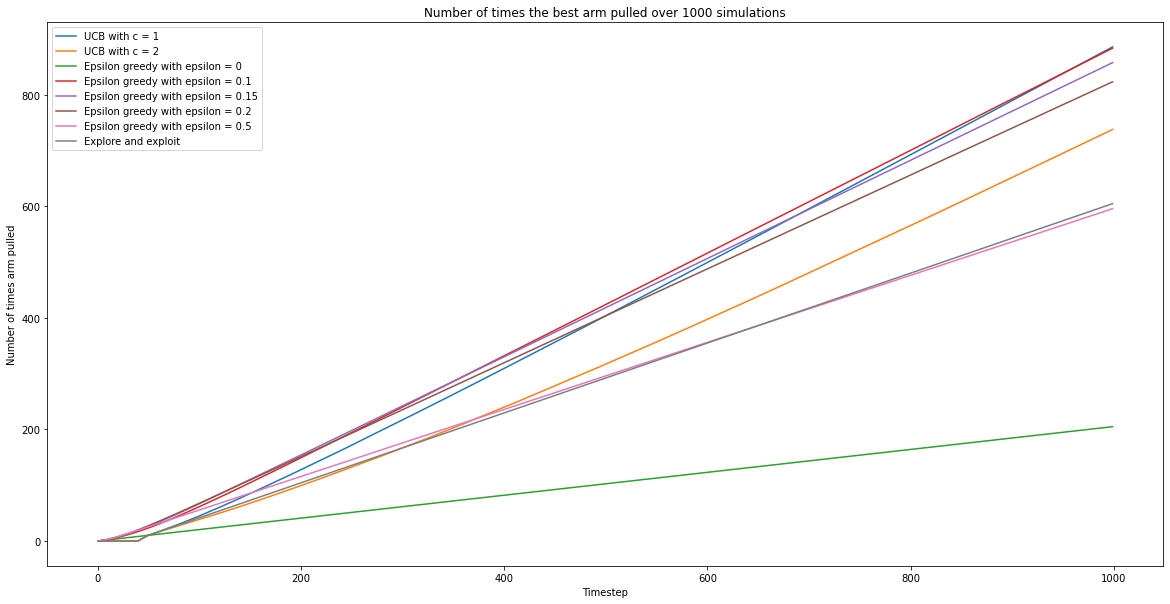

In [236]:
plt.figure(figsize=(20,10))
plt.plot(arm5ucb1,label = 'UCB with c = 1')
plt.plot(arm5ucb2,label = 'UCB with c = 2')
plt.plot(arm5ep0,label = 'Epsilon greedy with epsilon = 0')
plt.plot(arm5ep1,label = 'Epsilon greedy with epsilon = 0.1')
plt.plot(arm5ep2,label = 'Epsilon greedy with epsilon = 0.15')
plt.plot(arm5ep3,label = 'Epsilon greedy with epsilon = 0.2')
plt.plot(arm5ep4,label = 'Epsilon greedy with epsilon = 0.5')
plt.plot(armeae5,label = 'Explore and exploit')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times the best arm pulled over 1000 simulations')
plt.legend()

## Question 2

In [267]:
def epsilongreedydecay():
    rew1 = np.zeros(1000)
    arm1 = np.zeros(1000)
    arm2 = np.zeros(1000)
    arm3 = np.zeros(1000)
    arm4 = np.zeros(1000)
    arm5 = np.zeros(1000)
    for k in range(1000):
        j = 0.2
        arr1 = np.zeros(5)
        arr2 = np.zeros(5)
        rew = np.empty(0)
        arm = 4
        reward = np.random.normal(means[arm],1)
        arr1[arm] += reward
        arr2[arm] += 1
        if(arm == 0): arm1[0] += 1
        elif(arm == 1):arm2[0] += 1
        elif(arm == 2):arm3[0] += 1
        elif(arm == 3):arm4[0] += 1
        else:arm5[0] += 1
        rew = np.append(rew,reward)
        for i in range(1,horizon):
            j = j/math.sqrt(i+1)
            reward,arm = rewardepsilon(j,arr1,arr2)
            rew = np.append(rew,reward)
            if(arm == 0): arm1[i] += 1
            elif(arm == 1):arm2[i] += 1
            elif(arm == 2):arm3[i] += 1
            elif(arm == 3):arm4[i] += 1
            else:arm5[i] += 1
        for i in range(1000):
            if(k==0): 
                rew1[i] = rew[i]
                break
            n = (k*rew1[i] + rew[i])/(k+1) 
            rew1[i] = n
    for i in range(1,1000):
        arm1[i] = arm1[i] + arm1[i-1]
        arm2[i] = arm2[i] + arm2[i-1]
        arm3[i] = arm3[i] + arm3[i-1]
        arm4[i] = arm4[i] + arm4[i-1]
        arm5[i] = arm5[i] + arm5[i-1]
    return rew1,arm1/1000,arm2/1000,arm3/1000,arm4/1000,arm5/1000

In [330]:
rew2ep2,arm1,arm2,arm3,arm4,arm5 = epsilongreedydecay()

Text(0.5, 1.0, 'Reward each time step for decaying epsilon = 0.2')

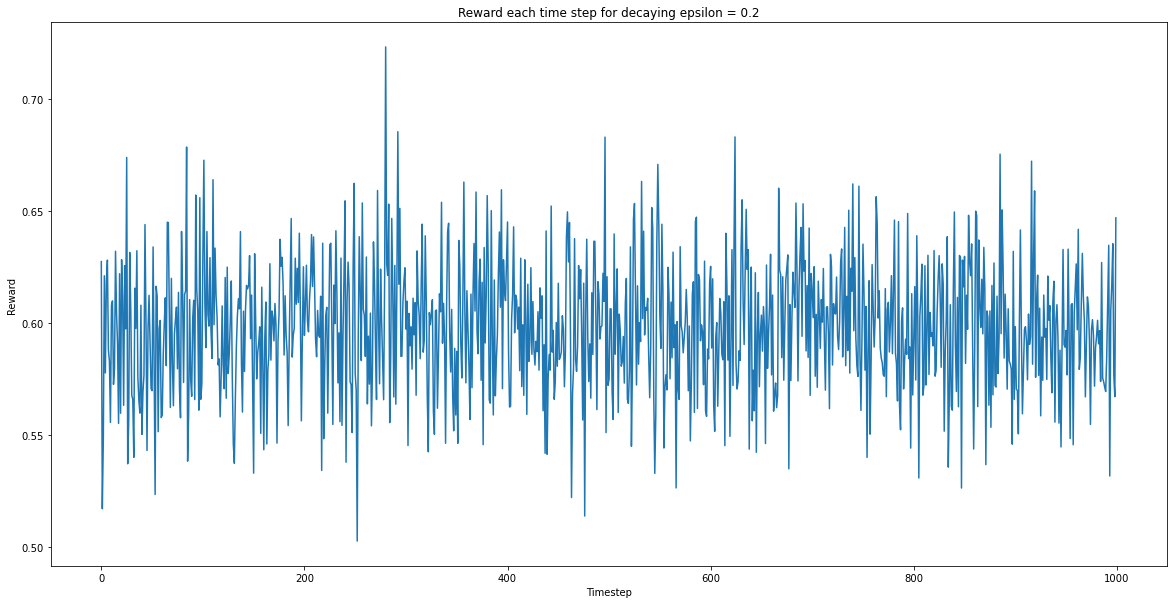

In [271]:
plt.figure(figsize = (20,10))
plt.plot(rew2ep2)
plt.xlabel('Timestep')  
plt.ylabel('Reward')
plt.title('Reward each time step for decaying epsilon = 0.2')

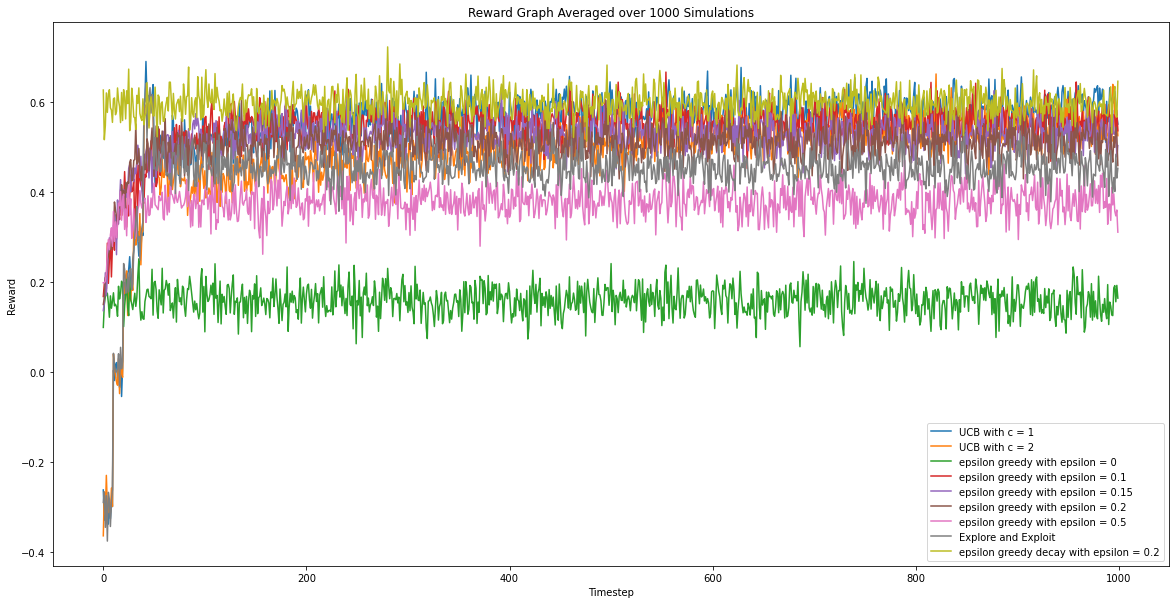

In [272]:
plt.figure(figsize=(20,10))
plt.plot(rewardUCB1, label = "UCB with c = 1")
plt.plot(rewardUCB2, label = "UCB with c = 2")
plt.plot(rewep0,label = 'epsilon greedy with epsilon = 0' )
plt.plot(rewep1,label = 'epsilon greedy with epsilon = 0.1' )
plt.plot(rewep2,label = 'epsilon greedy with epsilon = 0.15' )
plt.plot(rewep3,label = 'epsilon greedy with epsilon = 0.2' )
plt.plot(rewep4,label = 'epsilon greedy with epsilon = 0.5' )
plt.plot(reward,label = 'Explore and Exploit')
plt.plot(rew2ep2,label = 'epsilon greedy decay with epsilon = 0.2')
plt.xlabel('Timestep')  
plt.ylabel('Reward')
plt.title('Reward Graph Averaged over 1000 Simulations')
plt.legend()

In [336]:
for i in range(1,1000):
    rew2ep2[i] = rew2ep2[i] + rew2ep2[i-1]


In [340]:
for i in range(1,1001):
    rew2ep2[i-1] = (0.6*i - rew2ep2[i-1])/i

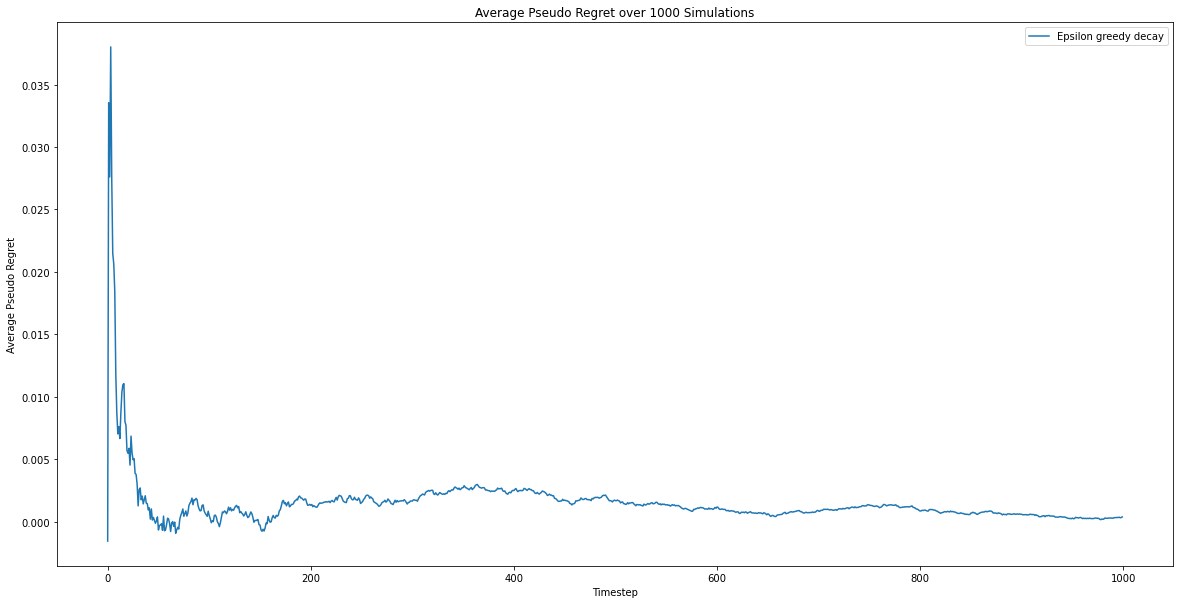

In [321]:
plt.figure(figsize = (20,10))
plt.plot(rew2ep2,label = 'Epsilon greedy decay')
plt.xlabel('Timestep')  
plt.ylabel('Average Pseudo Regret')
plt.title('Average Pseudo Regret over 1000 Simulations')
plt.legend()

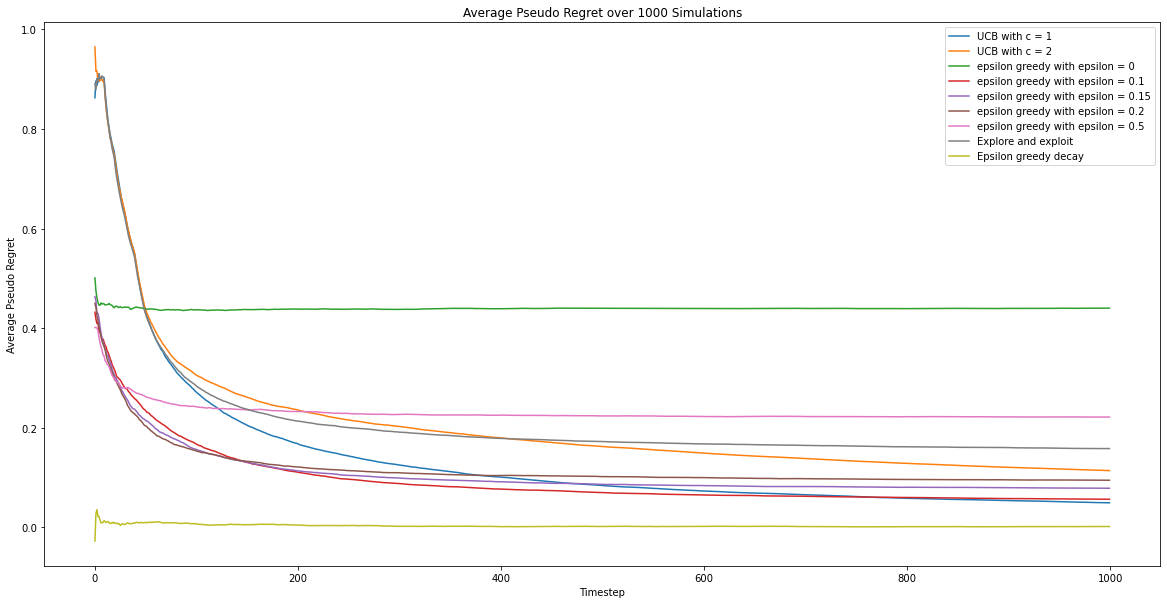

In [282]:
plt.figure(figsize = (20,10))
plt.plot(rewardUCB1,label = 'UCB with c = 1')
plt.plot(rewardUCB2,label = 'UCB with c = 2')
plt.plot(rewep0,label = 'epsilon greedy with epsilon = 0')
plt.plot(rewep1,label = 'epsilon greedy with epsilon = 0.1')
plt.plot(rewep2,label = 'epsilon greedy with epsilon = 0.15')
plt.plot(rewep3,label = 'epsilon greedy with epsilon = 0.2')
plt.plot(rewep4,label = 'epsilon greedy with epsilon = 0.5')
plt.plot(reward,label = 'Explore and exploit')
plt.plot(rew2ep2,label = 'Epsilon greedy decay')
plt.xlabel('Timestep')  
plt.ylabel('Average Pseudo Regret')
plt.title('Average Pseudo Regret over 1000 Simulations')
plt.legend()

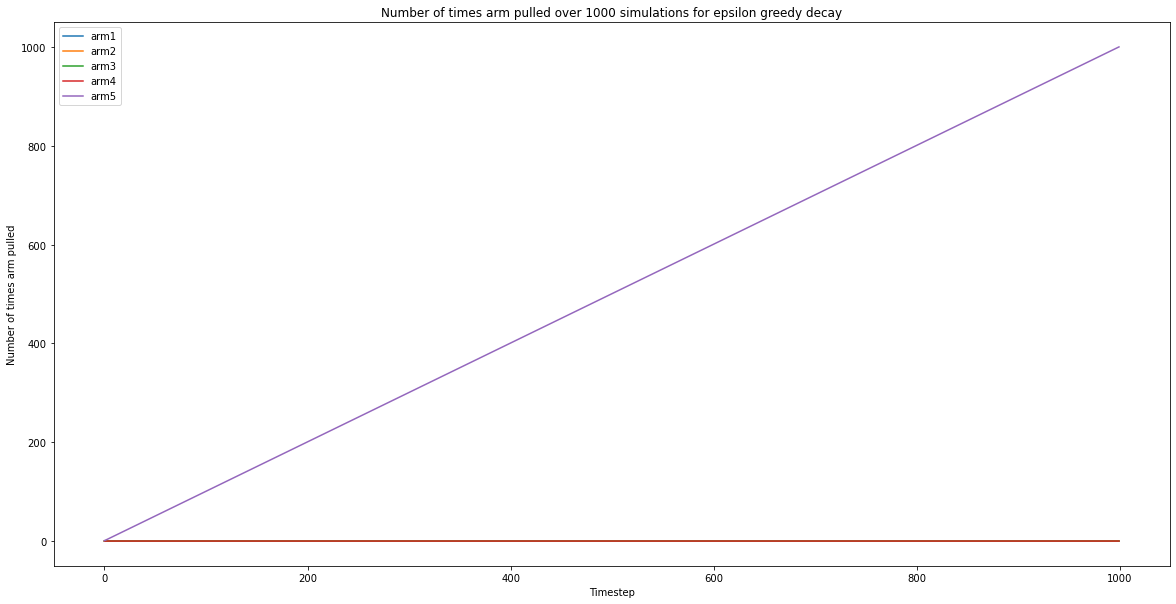

In [289]:
plt.figure(figsize=(20,10))
plt.plot(arm1,label = 'arm1')
plt.plot(arm2,label = 'arm2')
plt.plot(arm3,label = 'arm3')
plt.plot(arm4,label = 'arm4')
plt.plot(arm5,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations for epsilon greedy decay')
plt.legend()

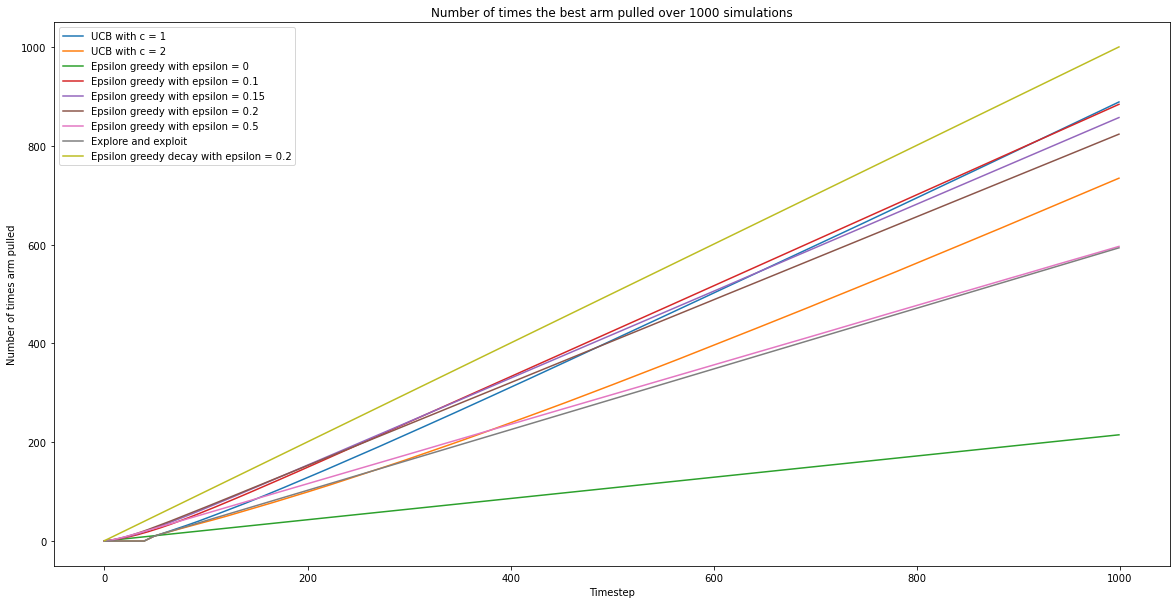

In [290]:
plt.figure(figsize=(20,10))
plt.plot(arm5ucb1,label = 'UCB with c = 1')
plt.plot(arm5ucb2,label = 'UCB with c = 2')
plt.plot(arm5ep0,label = 'Epsilon greedy with epsilon = 0')
plt.plot(arm5ep1,label = 'Epsilon greedy with epsilon = 0.1')
plt.plot(arm5ep2,label = 'Epsilon greedy with epsilon = 0.15')
plt.plot(arm5ep3,label = 'Epsilon greedy with epsilon = 0.2')
plt.plot(arm5ep4,label = 'Epsilon greedy with epsilon = 0.5')
plt.plot(armeae5,label = 'Explore and exploit')
plt.plot(arm5,label = 'Epsilon greedy decay with epsilon = 0.2')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times the best arm pulled over 1000 simulations')
plt.legend()

## Question 3

Gradient Bandit Algorithm

In [307]:
def getreward(H,rew,alpha):
    prob = np.zeros(5)
    for i in range(len(prob)):
        prob[i] = math.exp(H[i])/sum([math.exp(j) for j in H] )
    arm = np.random.choice(5, 1, p=prob)[0]
    reward = np.random.normal(means[arm],1)
    avg_rew = 0
    if(len(rew) != 0): avg_rew = sum(rew)/len(rew)
    for i in range(5):
        if(i == arm):H[arm] = H[arm] + alpha*(reward - avg_rew)*(1 - prob[arm])
        else: H[i] = H[i] - 0.1*(reward - avg_rew)*prob[i]
    return reward,arm

In [308]:
def getreward2(H,alpha):
    prob = np.zeros(5)
    for i in range(len(prob)):
        prob[i] = math.exp(H[i])/sum([math.exp(j) for j in H] )
    arm = np.random.choice(5, 1, p=prob)[0]
    reward = np.random.normal(means[arm],1)
    for i in range(5):
        if(i == arm):H[arm] = H[arm] + alpha*(reward)*(1 - prob[arm])
        else: H[i] = H[i] - 0.1*(reward)*prob[i]
    return reward,arm

In [309]:
def gradient(alpha,baseline = True):
    arm1 = np.zeros(1000)
    arm2 = np.zeros(1000)
    arm3 = np.zeros(1000)
    arm4 = np.zeros(1000)
    arm5 = np.zeros(1000)
    rew1 = np.zeros(1000)
    for j in range(1000):
        H = np.zeros(5)
        rew = np.empty(0)
        for i in range(1000):
            arm = -1
            if(baseline):
                reward,arm = getreward(H,rew,alpha)
                rew = np.append(rew,reward)
            else:
                reward,arm = getreward2(H,alpha)
                rew = np.append(rew,reward)
            if(arm == 0): arm1[i] += 1
            elif(arm == 1):arm2[i] += 1
            elif(arm == 2):arm3[i] += 1
            elif(arm == 3):arm4[i] += 1
            else:arm5[i] += 1
        for i in range(1000):
            if(j==0): 
                rew1[i] = rew[i]
                break
            n = ((j-1)*rew1[i] + rew[i])/j 
            rew1[i] = n
    for i in range(1,1000):
        arm1[i] = arm1[i] + arm1[i-1]
        arm2[i] = arm2[i] + arm2[i-1]
        arm3[i] = arm3[i] + arm3[i-1]
        arm4[i] = arm4[i] + arm4[i-1]
        arm5[i] = arm5[i] + arm5[i-1]
    return rew1,arm1/1000,arm2/1000,arm3/1000,arm4/1000,arm5/1000

In [331]:
rewardg1,arm1g1,arm2g1,arm3g1,arm4g1,arm5g1 = gradient(0.1)

In [332]:
rewardg2,arm1g2,arm2g2,arm3g2,arm4g2,arm5g2 = gradient(0.1,baseline = False)

In [333]:
rewardg3,arm1g3,arm2g3,arm3g3,arm4g3,arm5g3 = gradient(0.4)

In [334]:
rewardg4,arm1g4,arm2g4,arm3g4,arm4g4,arm5g4 = gradient(0.4,baseline = False)

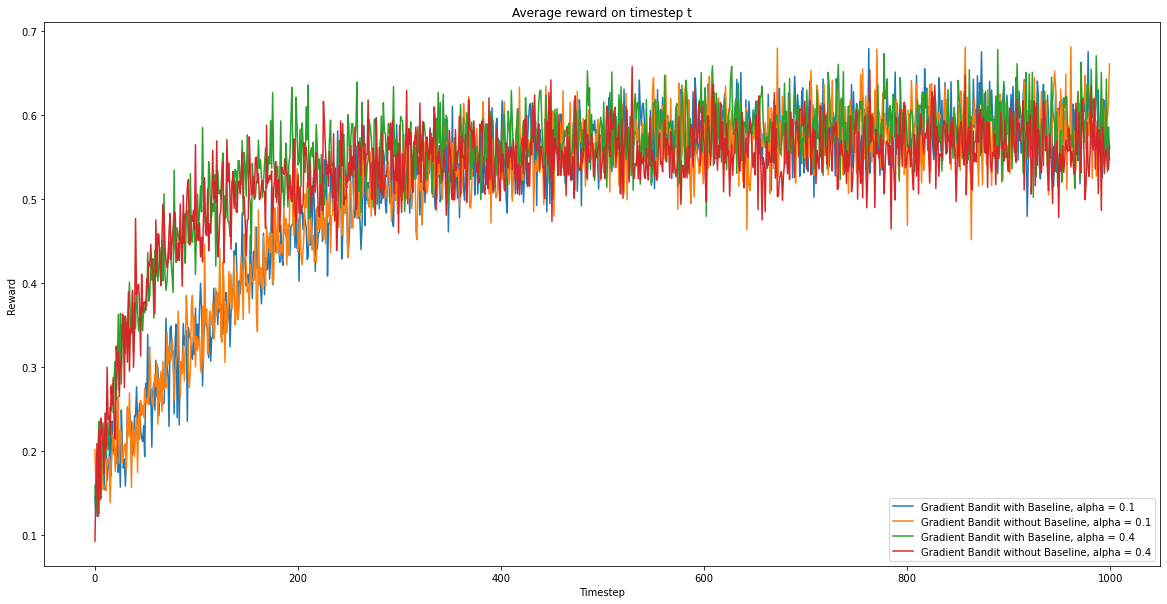

In [312]:
plt.figure(figsize = (20,10))
plt.plot(rewardg1,label = 'Gradient Bandit with Baseline, alpha = 0.1')
plt.plot(rewardg2,label = 'Gradient Bandit without Baseline, alpha = 0.1')
plt.plot(rewardg3,label = 'Gradient Bandit with Baseline, alpha = 0.4')
plt.plot(rewardg4,label = 'Gradient Bandit without Baseline, alpha = 0.4')
plt.xlabel('Timestep')  
plt.ylabel('Reward')
plt.title('Average reward on timestep t')
plt.legend()

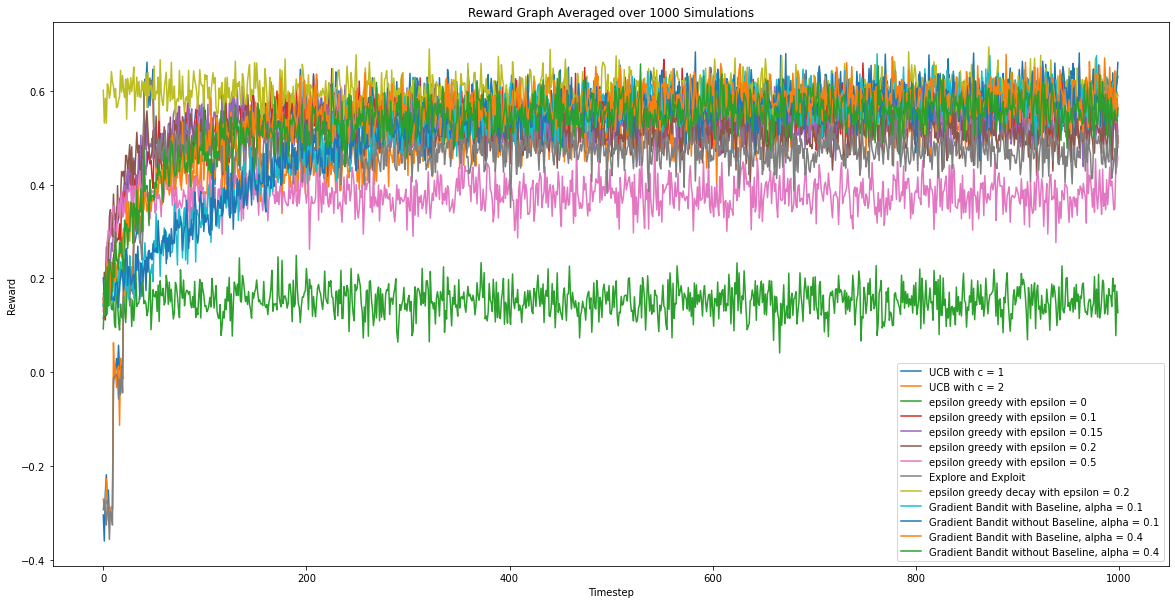

In [315]:
plt.figure(figsize=(20,10))
plt.plot(rewardUCB1, label = "UCB with c = 1")
plt.plot(rewardUCB2, label = "UCB with c = 2")
plt.plot(rewep0,label = 'epsilon greedy with epsilon = 0' )
plt.plot(rewep1,label = 'epsilon greedy with epsilon = 0.1' )
plt.plot(rewep2,label = 'epsilon greedy with epsilon = 0.15' )
plt.plot(rewep3,label = 'epsilon greedy with epsilon = 0.2' )
plt.plot(rewep4,label = 'epsilon greedy with epsilon = 0.5' )
plt.plot(reward,label = 'Explore and Exploit')
plt.plot(rew2ep2,label = 'epsilon greedy decay with epsilon = 0.2')
plt.plot(rewardg1,label = 'Gradient Bandit with Baseline, alpha = 0.1')
plt.plot(rewardg2,label = 'Gradient Bandit without Baseline, alpha = 0.1')
plt.plot(rewardg3,label = 'Gradient Bandit with Baseline, alpha = 0.4')
plt.plot(rewardg4,label = 'Gradient Bandit without Baseline, alpha = 0.4')
plt.xlabel('Timestep')  
plt.ylabel('Reward')
plt.title('Reward Graph Averaged over 1000 Simulations')
plt.legend()

In [337]:
for i in range(1,1000):
    rewardg1[i] = rewardg1[i] + rewardg1[i-1]
    rewardg2[i] = rewardg2[i] + rewardg2[i-1]
    rewardg3[i] = rewardg3[i] + rewardg3[i-1]
    rewardg4[i] = rewardg4[i] + rewardg4[i-1]


In [339]:
for i in range(1,1001):
    rewardg1[i-1] = (0.6*i - rewardg1[i-1])/i
    rewardg2[i-1] = (0.6*i - rewardg2[i-1])/i
    rewardg3[i-1] = (0.6*i - rewardg3[i-1])/i
    rewardg4[i-1] = (0.6*i - rewardg4[i-1])/i

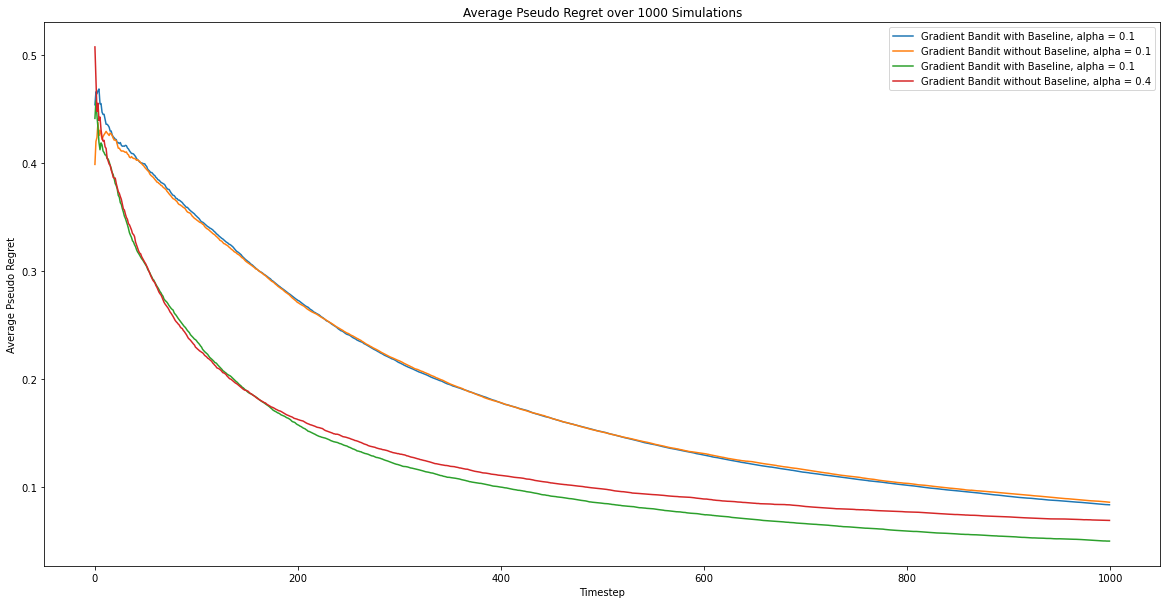

In [317]:
plt.figure(figsize = (20,10))
plt.plot(rewardg1,label = 'Gradient Bandit with Baseline, alpha = 0.1')
plt.plot(rewardg2,label = 'Gradient Bandit without Baseline, alpha = 0.1')
plt.plot(rewardg3,label = 'Gradient Bandit with Baseline, alpha = 0.1')
plt.plot(rewardg4,label = 'Gradient Bandit without Baseline, alpha = 0.4')
plt.xlabel('Timestep')  
plt.ylabel('Average Pseudo Regret')
plt.title('Average Pseudo Regret over 1000 Simulations')
plt.legend()

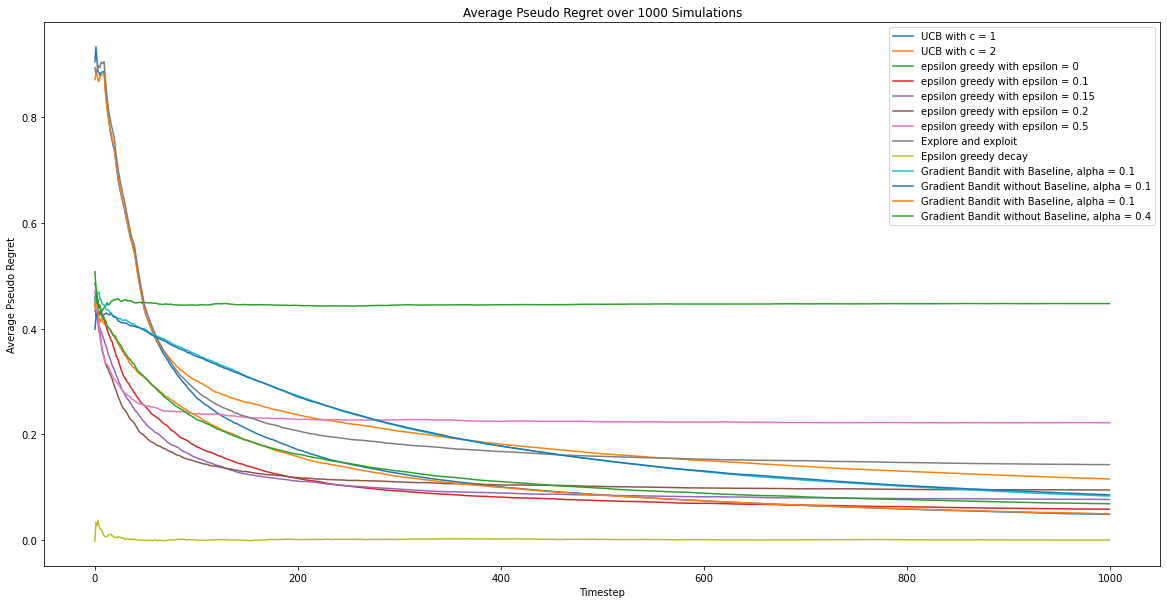

In [322]:
plt.figure(figsize = (20,10))
plt.plot(rewardUCB1,label = 'UCB with c = 1')
plt.plot(rewardUCB2,label = 'UCB with c = 2')
plt.plot(rewep0,label = 'epsilon greedy with epsilon = 0')
plt.plot(rewep1,label = 'epsilon greedy with epsilon = 0.1')
plt.plot(rewep2,label = 'epsilon greedy with epsilon = 0.15')
plt.plot(rewep3,label = 'epsilon greedy with epsilon = 0.2')
plt.plot(rewep4,label = 'epsilon greedy with epsilon = 0.5')
plt.plot(reward,label = 'Explore and exploit')
plt.plot(rew2ep2,label = 'Epsilon greedy decay')
plt.plot(rewardg1,label = 'Gradient Bandit with Baseline, alpha = 0.1')
plt.plot(rewardg2,label = 'Gradient Bandit without Baseline, alpha = 0.1')
plt.plot(rewardg3,label = 'Gradient Bandit with Baseline, alpha = 0.1')
plt.plot(rewardg4,label = 'Gradient Bandit without Baseline, alpha = 0.4')
plt.xlabel('Timestep')  
plt.ylabel('Average Pseudo Regret')
plt.title('Average Pseudo Regret over 1000 Simulations')
plt.legend()

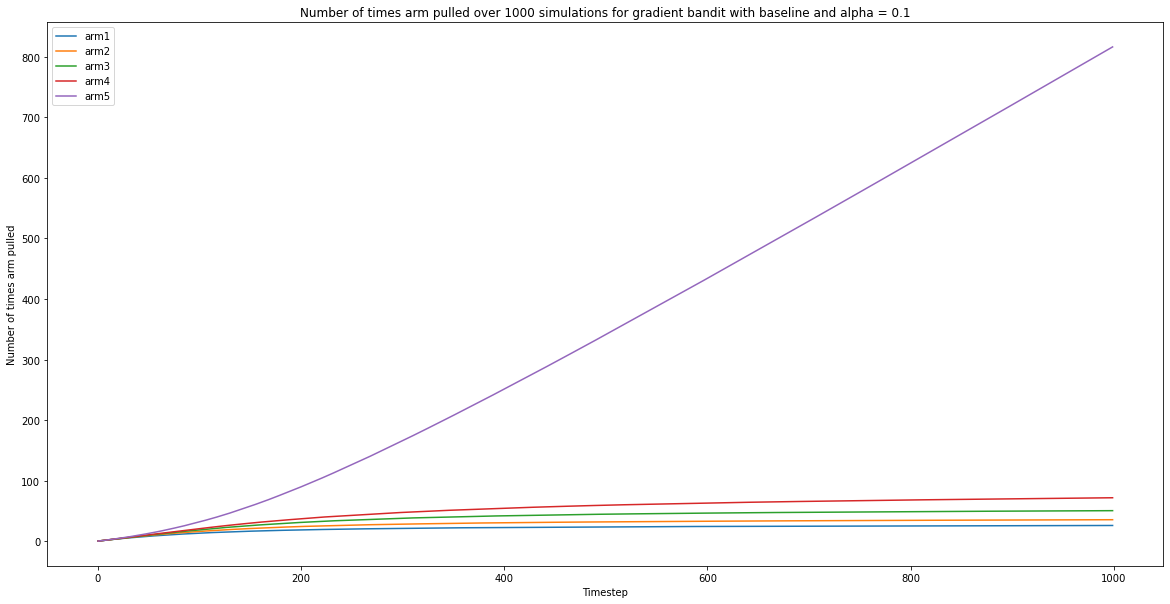

In [323]:
plt.figure(figsize=(20,10))
plt.plot(arm1g1,label = 'arm1')
plt.plot(arm2g1,label = 'arm2')
plt.plot(arm3g1,label = 'arm3')
plt.plot(arm4g1,label = 'arm4')
plt.plot(arm5g1,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations for gradient bandit with baseline and alpha = 0.1')
plt.legend()

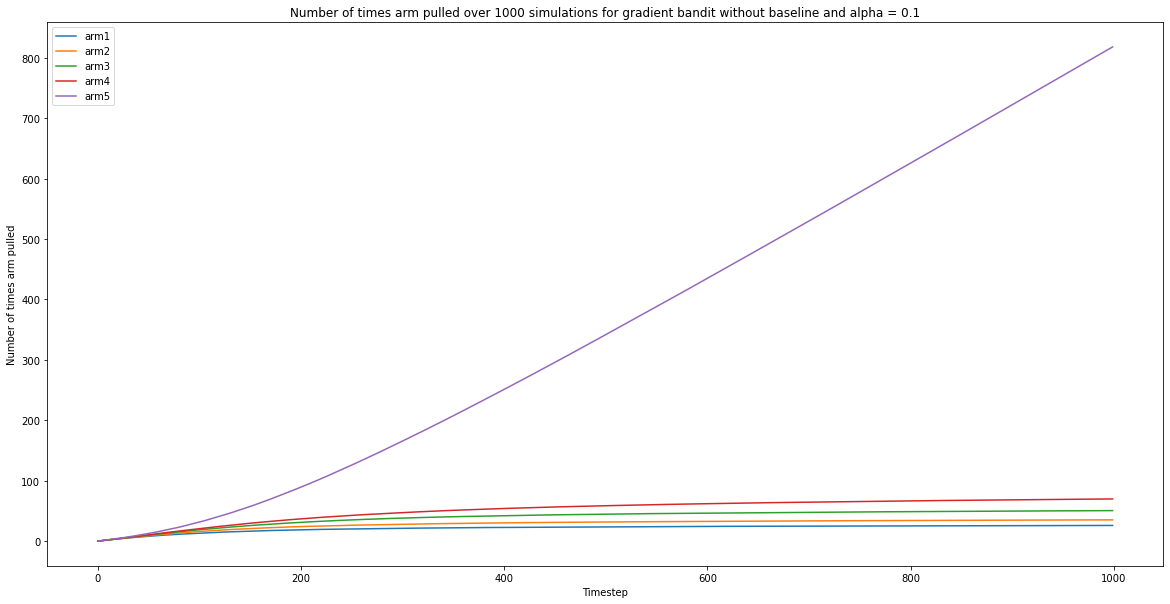

In [324]:
plt.figure(figsize=(20,10))
plt.plot(arm1g2,label = 'arm1')
plt.plot(arm2g2,label = 'arm2')
plt.plot(arm3g2,label = 'arm3')
plt.plot(arm4g2,label = 'arm4')
plt.plot(arm5g2,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations for gradient bandit without baseline and alpha = 0.1')
plt.legend()

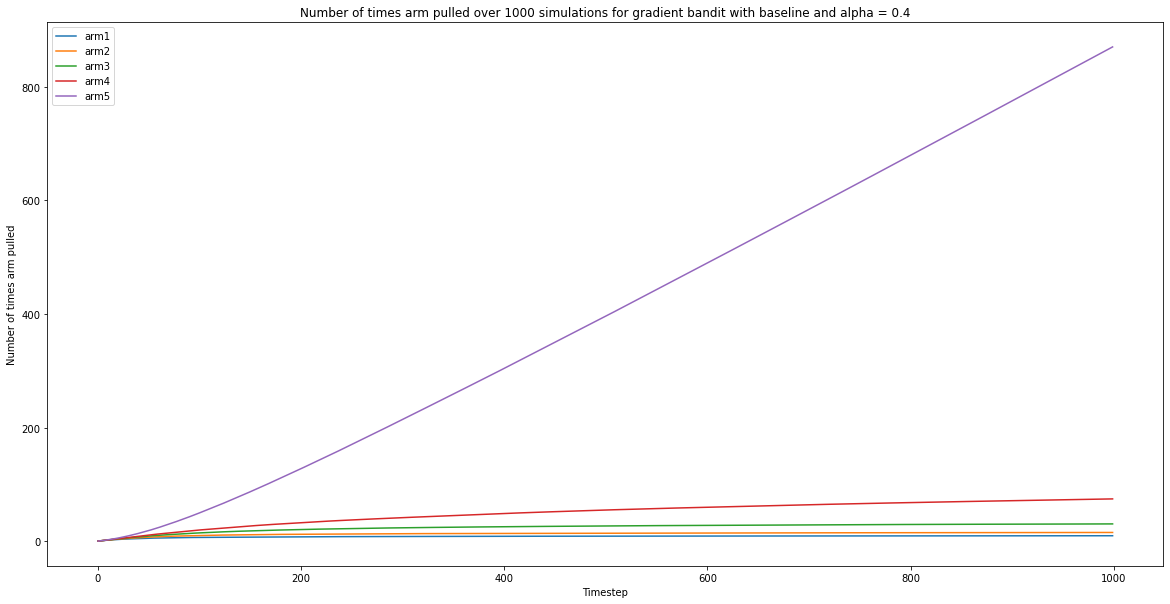

In [325]:
plt.figure(figsize=(20,10))
plt.plot(arm1g3,label = 'arm1')
plt.plot(arm2g3,label = 'arm2')
plt.plot(arm3g3,label = 'arm3')
plt.plot(arm4g3,label = 'arm4')
plt.plot(arm5g3,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations for gradient bandit with baseline and alpha = 0.4')
plt.legend()

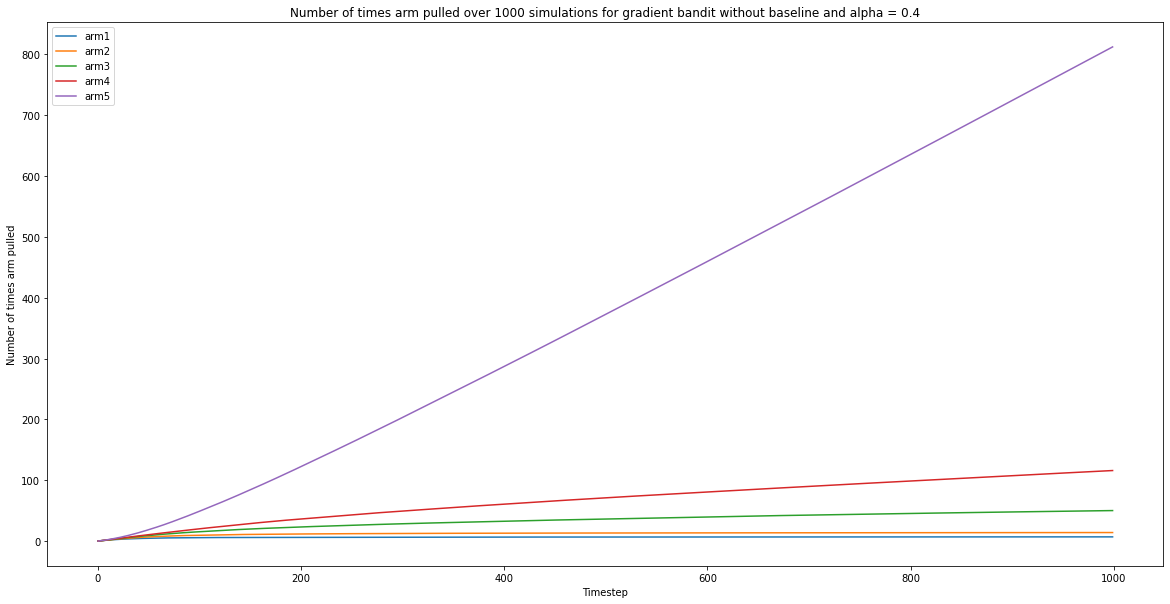

In [327]:
plt.figure(figsize=(20,10))
plt.plot(arm1g4,label = 'arm1')
plt.plot(arm2g4,label = 'arm2')
plt.plot(arm3g4,label = 'arm3')
plt.plot(arm4g4,label = 'arm4')
plt.plot(arm5g4,label = 'arm5')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times arm pulled over 1000 simulations for gradient bandit without baseline and alpha = 0.4')
plt.legend()

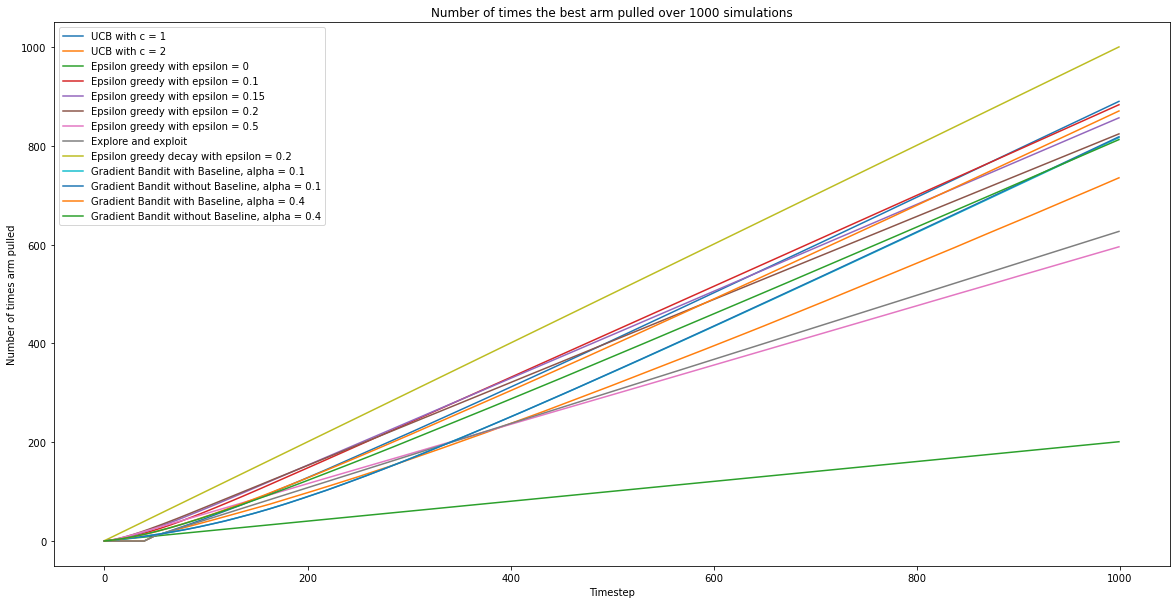

In [328]:
plt.figure(figsize=(20,10))
plt.plot(arm5ucb1,label = 'UCB with c = 1')
plt.plot(arm5ucb2,label = 'UCB with c = 2')
plt.plot(arm5ep0,label = 'Epsilon greedy with epsilon = 0')
plt.plot(arm5ep1,label = 'Epsilon greedy with epsilon = 0.1')
plt.plot(arm5ep2,label = 'Epsilon greedy with epsilon = 0.15')
plt.plot(arm5ep3,label = 'Epsilon greedy with epsilon = 0.2')
plt.plot(arm5ep4,label = 'Epsilon greedy with epsilon = 0.5')
plt.plot(armeae5,label = 'Explore and exploit')
plt.plot(arm5,label = 'Epsilon greedy decay with epsilon = 0.2')
plt.plot(arm5g1,label = 'Gradient Bandit with Baseline, alpha = 0.1')
plt.plot(arm5g2,label = 'Gradient Bandit without Baseline, alpha = 0.1')
plt.plot(arm5g3,label = 'Gradient Bandit with Baseline, alpha = 0.4')
plt.plot(arm5g4,label = 'Gradient Bandit without Baseline, alpha = 0.4')
plt.xlabel('Timestep')  
plt.ylabel('Number of times arm pulled')
plt.title('Number of times the best arm pulled over 1000 simulations')
plt.legend()

# Extra Graph (Total reward upto time t averaged over 1000 simulations)

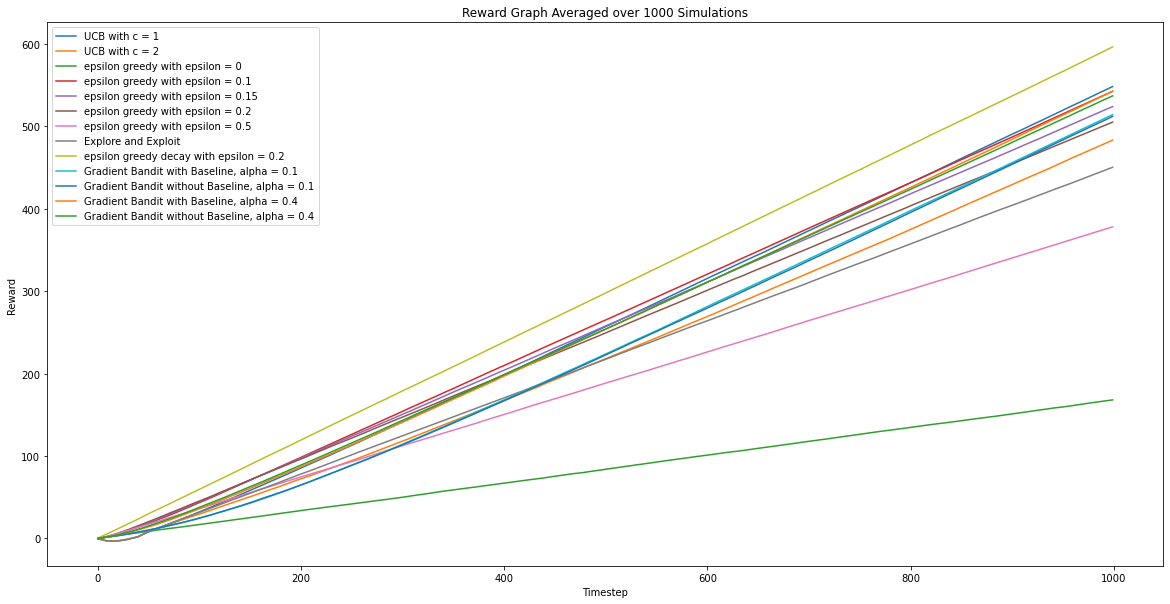

In [338]:
plt.figure(figsize=(20,10))
plt.plot(rewardUCB1, label = "UCB with c = 1")
plt.plot(rewardUCB2, label = "UCB with c = 2")
plt.plot(rewep0,label = 'epsilon greedy with epsilon = 0' )
plt.plot(rewep1,label = 'epsilon greedy with epsilon = 0.1' )
plt.plot(rewep2,label = 'epsilon greedy with epsilon = 0.15' )
plt.plot(rewep3,label = 'epsilon greedy with epsilon = 0.2' )
plt.plot(rewep4,label = 'epsilon greedy with epsilon = 0.5' )
plt.plot(reward,label = 'Explore and Exploit')
plt.plot(rew2ep2,label = 'epsilon greedy decay with epsilon = 0.2')
plt.plot(rewardg1,label = 'Gradient Bandit with Baseline, alpha = 0.1')
plt.plot(rewardg2,label = 'Gradient Bandit without Baseline, alpha = 0.1')
plt.plot(rewardg3,label = 'Gradient Bandit with Baseline, alpha = 0.4')
plt.plot(rewardg4,label = 'Gradient Bandit without Baseline, alpha = 0.4')
plt.xlabel('Timestep')  
plt.ylabel('Reward')
plt.title('Total Reward till time t averaged over 1000 Simulations')
plt.legend()